## Trusted Messengers Oct22 Survey Data Analysis

#### Notes from Morning Consult:
* All the data are stacked (includes data from all national + state oversamples); the sample is denoted by the AUD variable.
* The weights are with respect to their sample, i.e. Wisconsin voters. 
* The candidates that people saw for, say, BPC6a are in BPC6a_cand1n and BPC6a_cand2n. Their choice in the conjoint, candidate 1, 2, or neither (3) is denoted in BPC6a. That pattern continues through f.
* BPC7 is broken out based on overall and then who was the messenger.


#### Other Notes:
* BPC1: 1 = Selected, 2 = Not Selected (13 choices + other, don't consume election info, and don't know/no opinion)
* BPCdem1 = To what extent, if at all, do you think of yourself as being a part of the MAGA (Make America Great Again) movement?
* BPCdem2 = To what extent, if at all, do you think of yourself as being a progressive?

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
path = "pngs/"

### Load variables

In [52]:
codebook = pd.read_csv('2210068_levels_codebook.csv', encoding='utf-8')
data = pd.read_csv('2210068_raw_data.csv', encoding='utf-8')

q_codebook = pd.read_csv('2210068_question_codebook.csv', encoding='utf-8', index_col = 'qid')
# q_codebook into dict
q_codebook = q_codebook.to_dict().get('qidFull')

### Seperating Data by General Population and State

In [53]:
display(codebook[codebook["question"]=="AUD"])
print(data['AUD'].value_counts())

data_genpop = data[data['AUD']==1]
data_CO = data[data['AUD']==2]
data_GA = data[data['AUD']==3]
data_WI = data[data['AUD']==4]

print("\nChecking that split dataset length equals original: ",len(data_genpop),len(data_CO),len(data_GA),len(data_WI))

# data.info()

## filter: set data df to only be genpop
data = data[data['AUD']==1] 

,value,code,question
5,1,GENPOP,AUD
6,2,Colorado,AUD
7,3,Georgia,AUD
8,4,Wisconsin,AUD


AUD
1    2002
2     805
3     805
4     501
Name: count, dtype: int64

Checking that split dataset length equals original:  2002 805 805 501


### Null Values

In [54]:
nulldata = pd.DataFrame(data.isnull().sum(),columns=["Sum_Null"]) ##4113 rows in entire dataset
nulldata.sort_values(by=["Sum_Null"],ascending=False,inplace=True)

nulldata[nulldata["Sum_Null"]>0].head(20)

#BPC2: You indicated that you do not consume information on how to vote, why is that?
#BPC4: You indicated that you are not interested in learning about how elections are run in the United States , why is that?

,Sum_Null
BPC2,2002
BPC1_14_TEXT,2002
BPC4,2002
BPC3_14_TEXT,2002
BPC17_9_TEXT,2002
BPC5_14_TEXT,2002
BPCxdem7,1962
xdemReligOther,1865
xdemHispBin,1853
BPCxdem8,1841


## QUESTIONS ONE, THREE, FIVE: Trusted Sources

* Question 1: In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? You may select up to 3 choices.
* Question 3: If you wanted to know more about how elections are run in the United States, where would you be most likely to look for that information? You may select up to 3 choices.
* Question 5: If you are interested in learning about the winner of an election, what source would you be most likely to look to for results? You may select up to 3 choices.

<!-- moved to demographic analysis section
* BPCdem1 = To what extent, if at all, do you think of yourself as being a part of the MAGA (Make America Great Again) movement?
* BPCdem2 = To what extent, if at all, do you think of yourself as being a progressive? -->

In [55]:
#### GET TOPLINE DATA FROM EACH QUESTION


titles = {1:"Question 1: In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? You may select up to 3 choices.",
          3:"Question 3: If you wanted to know more about how elections are run in the United States, where would you be most likely to look for that information? You may select up to 3 choices.",
          5:"Question 5: If you are interested in learning about the winner of an election, what source would you be most likely to look to for results? You may select up to 3 choices."}

for q in [1,3,5]: 

    # get relevant columns of dataste by question
    df = data[[col for col in data.columns if col[:5]=="BPC"+str(q)+"_"]]
    
    # #for each column, add value counts to results df
    # df_res = df.apply(lambda x: x.value_counts()).fillna(0).transpose()

    # for each column, add weighted value counts to results df
    df_res = pd.DataFrame(df.apply(lambda x: (x == 1).mul(data['wts']).sum()).transpose())
    
    #grab names of each category from codebook and sub in as index titles
    cats = [q_codebook.get(x) for x in df_res.index]
    cats = [s[s.find("\\\\ ")+3:] for s in cats]
    df_res.index = cats

    # df_res.drop([2],axis=1,inplace=True)
    df_res.columns = ["Percent Selected"]
    df_res.drop(" TEXT",inplace=True)
    df_res.sort_values(by="Percent Selected",ascending=False,inplace=True)

#     fig = df_res.plot.barh(title="\n".join(wrap(titles.get(q), 90))).get_figure()
#     plot_title = "q"+str(q)+"_total"
#     fig.savefig(path+plot_title+".png",bbox_inches='tight')

    for col in df_res.columns:
        df_res[col] = df_res[col].div(len(df), axis=0)
    
    df_res.to_csv("csvs/PERCENTq"+str(q)+"_overall_"+"data.csv")

    display(df_res)

,Percent Selected
Your local election office,0.395830
Search through Google or other search engines,0.358347
Your state election office,0.336652
Friends and family,0.246593
Local or regional television,0.179325
"Social media such as Facebook, Twitter, or Instagram",0.170593
National television,0.167898
Television news website,0.151873
"Print publications, such as newspapers or magazines",0.094403
Print publications news websites,0.080841


,Percent Selected
Search through Google or other search engines,0.449556
Your state election office,0.370464
Your local election office,0.335937
National television,0.192192
Friends and family,0.178540
Local or regional television,0.149486
"Social media such as Facebook, Twitter, or Instagram",0.148334
Television news website,0.144549
Print publications news websites,0.107653
"Print publications, such as newspapers or magazines",0.097538


,Percent Selected
National television,0.382286
Local or regional television,0.371419
Search through Google or other search engines,0.322970
Television news website,0.270370
"Social media such as Facebook, Twitter, or Instagram",0.182459
Your local election office,0.181738
Your state election office,0.180937
Friends and family,0.157775
Radio,0.106113
"Print publications, such as newspapers or magazines",0.090855


In [56]:
#function to count "1" df_responses (aka "Selected")

def count_selected(series):
    return (series == 1).mul(data['wts']).sum() #

#function to analyze qs 1,3,&5
def topthree_analysis(q,demo):
    #create df_results dc
    df_res = pd.DataFrame(columns=[1,2,3])

    #dict of codebook results on demo
    demo_dict = codebook[codebook["question"]==demo].set_index('value').to_dict().get('code')

    #filter data
    df = data[[demo] + [col for col in data.columns if col[:5]=="BPC"+str(q)+"_"]]

    #for each column, group by demo and count values
    for col in range(1,len(df.columns)):
        df_res = pd.concat([df_res,df.groupby(demo)[df.columns[col]].apply(count_selected).to_frame().transpose()])
    
    democount = df.groupby(demo).count()
    democount = democount[[democount.columns[0]]]
    democount.index = [demo_dict.get(x) for x in democount.index]
    democount.columns = ["democount"]
    display(democount)
        
    #rename columns with values from codebook
    for i in df_res.columns:
        df_res.rename(columns={i:demo_dict.get(i)}, inplace=True)

    #grab names of each category from codebook and sub in as index titles
    cats = [q_codebook.get(x) for x in df_res.index]
    cats = [s[s.find("\\\\ ")+3:] for s in cats]
    df_res.index = cats
    #cleaning data
    df_res.drop([' TEXT'],inplace=True) ## drop text: empty
    display(df_res)
    
    return(df_res,democount)

def stackedbar(q,legend_title,plot_title):
    
    totals = q.sum(axis=1)
    percent = q.div(totals, axis=0).mul(100).round(2)
    percent.sort_values(by=percent.columns[0],ascending=True,inplace=True)

    # create the plot
    ax = percent.plot(kind='barh', stacked=True, figsize=(12, 9),  xticks=[])
    # move the legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False,title=legend_title)

    # remove ticks
    ax.tick_params(left=False, bottom=False)
    # remove all spines
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

    titles = {1:"Question 1: In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? You may select up to 3 choices.",
              3:"Question 3: If you wanted to know more about how elections are run in the United States, where would you be most likely to look for that information? You may select up to 3 choices.",
              5:"Question 5: If you are interested in learning about the winner of an election, what source would you be most likely to look to for results? You may select up to 3 choices."}

    titlefont = {'fontsize': 11, 'fontweight' : 10, 'verticalalignment': 'baseline'}
    ax.set_title(plot_title)
#     ax.set_title(titles.get(q))
#     ax.set_title("\n".join(wrap(titles.get(q), 100)),fontdict=titlefont,loc='center',pad=5)

    # iterate through each container
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
        
    plt.savefig(f"{path}{plot_title}.png",bbox_inches='tight')  
    plt.show()

In [57]:
df_res,democount = topthree_analysis(5,'age')

/tmp/ipykernel_3120/2433922927.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res = pd.concat([df_res,df.groupby(demo)[df.columns[col]].apply(count_selected).to_frame().transpose()])


,democount
Age: 18-34,513
Age: 35-44,327
Age: 45-64,721
Age: 65+,441


,Age: 18-34,Age: 35-44,Age: 45-64,Age: 65+
National television,143.554447,99.689688,286.502569,235.589741
Local or regional television,106.037279,86.208215,297.413497,253.921933
Radio,66.420540,47.197003,46.602887,52.217817
"Print publications, such as newspapers or magazines",38.366450,23.129394,52.437026,67.959432
Print publications news websites,43.612769,34.961784,54.745750,38.537141
Television news website,116.592722,74.302935,181.010828,169.374117
"Social media such as Facebook, Twitter, or Instagram",178.118529,65.965699,89.681168,31.517614
Search through Google or other search engines,181.115204,118.771800,226.539290,120.159431
Podcasts,51.154938,12.819705,11.432047,5.843679
Friends and family,126.393329,74.626989,67.967206,46.877197


1


/tmp/ipykernel_3120/2433922927.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res = pd.concat([df_res,df.groupby(demo)[df.columns[col]].apply(count_selected).to_frame().transpose()])


,democount
A great deal,221
Somewhat,234
Very little,160
Not at all,145


,A great deal,Somewhat,Very little,Not at all
National television,38.198346,32.525790,26.607500,17.447297
Local or regional television,42.421923,34.242258,34.711353,17.511329
Radio,29.837477,16.125354,9.394706,7.154531
"Print publications, such as newspapers or magazines",21.507125,22.314406,13.097266,18.640703
Print publications news websites,21.950416,11.653673,12.275900,10.172510
Television news website,37.455798,27.556347,20.705219,19.134673
"Social media such as Facebook, Twitter, or Instagram",50.129994,31.788702,25.135755,18.187564
Search through Google or other search engines,97.033489,83.344147,59.778794,59.501129
Podcasts,11.979717,5.789740,1.406058,6.499163
Friends and family,71.881915,88.855295,33.192222,34.419759


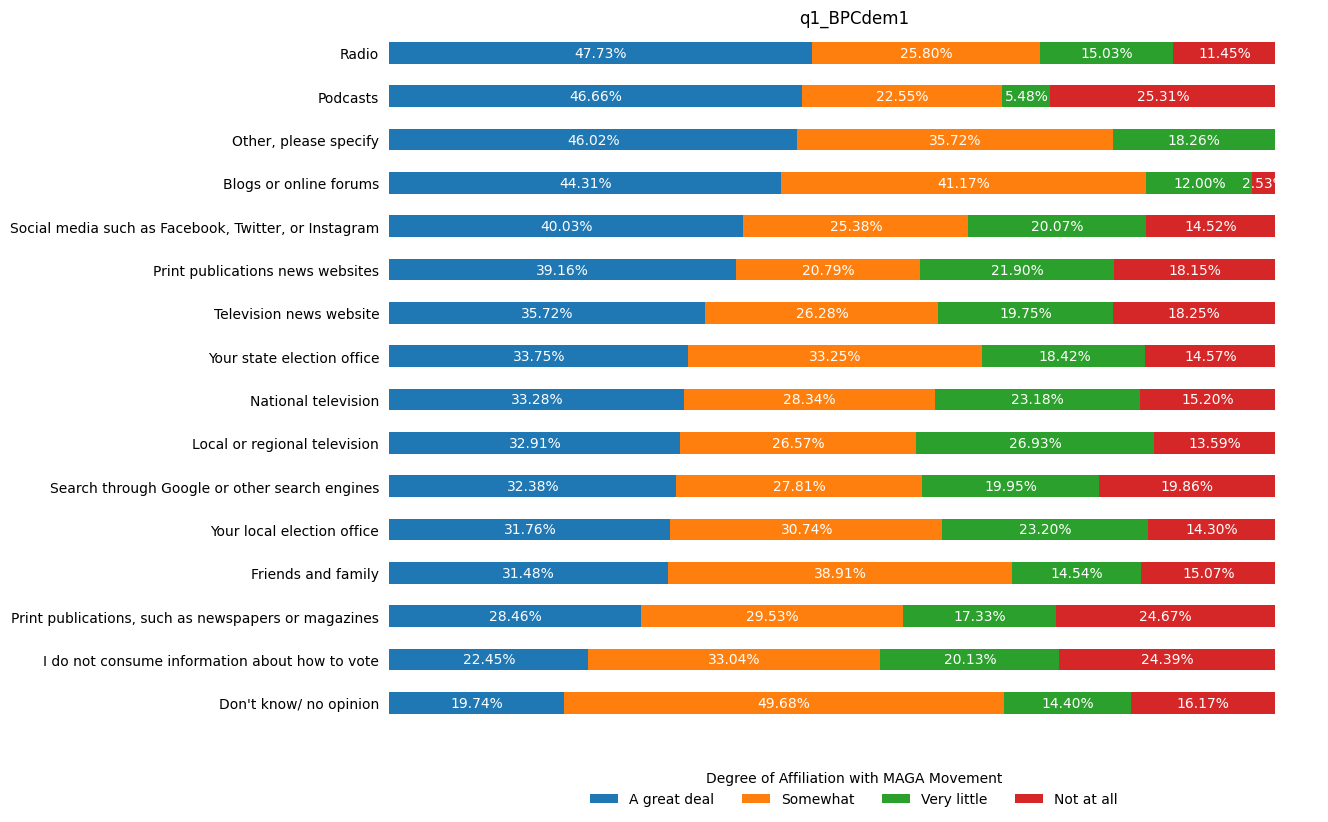

OSError: Cannot save file into a non-existent directory: '//infogram'

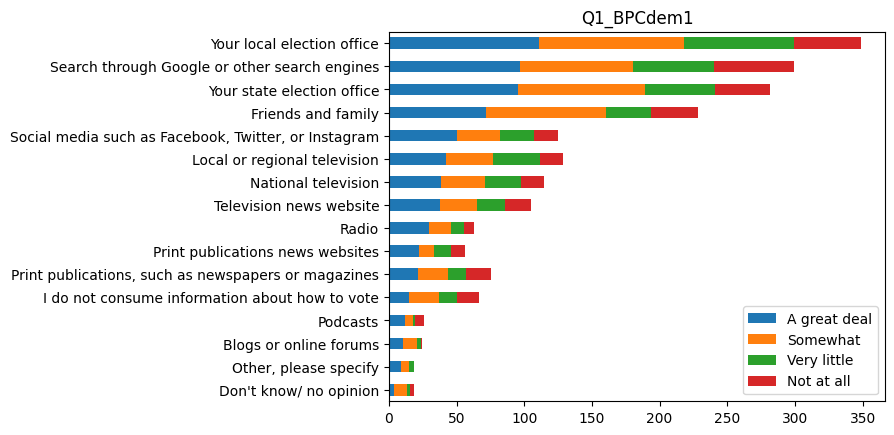

In [58]:
# CREATE CHARTS BY DEMOGRAPHIC CATEGORY
legend_dict = {"BPCdem1":"Degree of Affiliation with MAGA Movement",
               "BPCdem2":"Degree of Affiliation with Progressive Movement",
               "xpid3":"Party ID",
               "age":"Age"}

for question in [1,3,5]:
    print(question)
    for demo in legend_dict.keys():
        q_df,democount = topthree_analysis(question,demo)
        stackedbar(q_df,legend_dict.get(demo),plot_title="q"+str(question)+"_"+demo)
        q_df = q_df.sort_values(by=q_df.columns[0],ascending=True)
        plot_title = "Q"+str(question)+"_"+demo
        stackedbar_total = q_df.plot.barh(stacked=True,title=plot_title).get_figure()
        stackedbar_total.savefig(f"{path}_{plot_title}.png",bbox_inches='tight')
        q_df.to_csv("//infogram//q"+str(question)+"_"+demo+"_"+"data.csv")

        for col in q_df.columns:
            q_df[col] = q_df[col].div(democount['democount'].loc[col], axis=0)
        q_df.to_csv("//infogram//PERCENTq"+str(question)+"_"+demo+"_"+"data.csv")

In [9]:

titles = {1:"Question 1: In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? You may select up to 3 choices.",
          3:"Question 3: If you wanted to know more about how elections are run in the United States, where would you be most likely to look for that information? You may select up to 3 choices.",
          5:"Question 5: If you are interested in learning about the winner of an election, what source would you be most likely to look to for results? You may select up to 3 choices."}
titles.get(1)

'Question 1: In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? You may select up to 3 choices.'

In [10]:
##DOWNLOAD CSV FOR CORRELATION MATRIX
for q in [1,3,5]: 
    qraw = data[[col for col in data.columns if col[:5]=="BPC"+str(q)+"_"]]
    qraw.replace(2,0,inplace=True)
#     qraw.drop(["BPC1_14_TEXT"],axis=1,inplace=True)

    #grab names of each category from codebook and sub in as index titles
    cats = [q_codebook.get(x) for x in qraw.columns]
    cats = [s[s.find("\\\\ ")+3:] for s in cats]
    qraw.columns = cats

    qcorr = qraw.corr()
    qcorr.to_csv("C://Users//rorey//OneDrive - Bipartisan Policy Center//Elections Project//Research//MEDSL Grants 2022//Survey Data//BPC 2210068//q"+str(q)+"_correlationmatrix.csv")  

C:\Users\rorey\AppData\Local\Temp\ipykernel_27972\1335145908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qraw.replace(2,0,inplace=True)
C:\Users\rorey\AppData\Local\Temp\ipykernel_27972\1335145908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qraw.replace(2,0,inplace=True)
C:\Users\rorey\AppData\Local\Temp\ipykernel_27972\1335145908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qraw.replace(2,0,inplace=True)


#### Question 8: If there is a question about whether a ballot was legally cast, who do you think should decide whether it should be counted?  

In [11]:
def q8analysis(q,demo):
    #dict of codebook results on demo
    demo_dict = codebook[codebook["question"]==demo].set_index('value').to_dict().get('code')

    #filter data
    df = data[[demo] + [col for col in data.columns if col[:4]=="BPC"+str(q)]]
    df_res = df.groupby(demo).value_counts().to_frame()
    df_res.reset_index(inplace=True)
    df_res = pd.pivot(df_res,index=["BPC"+str(q)],columns=[demo])

    #rename columns with values from codebook
    df_res.columns = [df_res.columns[i][1] for i in range(len(df_res.columns))]
    for i in df_res.columns:
        df_res.rename(columns={i:demo_dict.get(i)}, inplace=True)

    #grab names of each category from codebook and sub in as index titles
    cats = codebook[codebook["question"]=="BPC"+str(q)][["value","code"]].set_index('value').to_dict()['code']
    df_res.index = [cats.get(ind) for ind in df_res.index]

    return(df_res)

In [12]:
demos = ["xpid3","BPCdem1","BPCdem2"]
q=8
for demo in demos:
    df = data[[demo] + [col for col in data.columns if col[:4]=="BPC"+str(q)]]
    display(df.groupby(demo).count())
    print(df.groupby(demo).count().sum(),"total number of respondents in this category")

,BPC8
xpid3,
1,823
2,542
3,637


BPC8    2002
dtype: int64 total number of respondents in this category


,BPC8
BPCdem1,
1.0,221
2.0,234
3.0,160
4.0,145


BPC8    760
dtype: int64 total number of respondents in this category


,BPC8
BPCdem2,
1.0,255
2.0,442
3.0,179
4.0,82


BPC8    958
dtype: int64 total number of respondents in this category


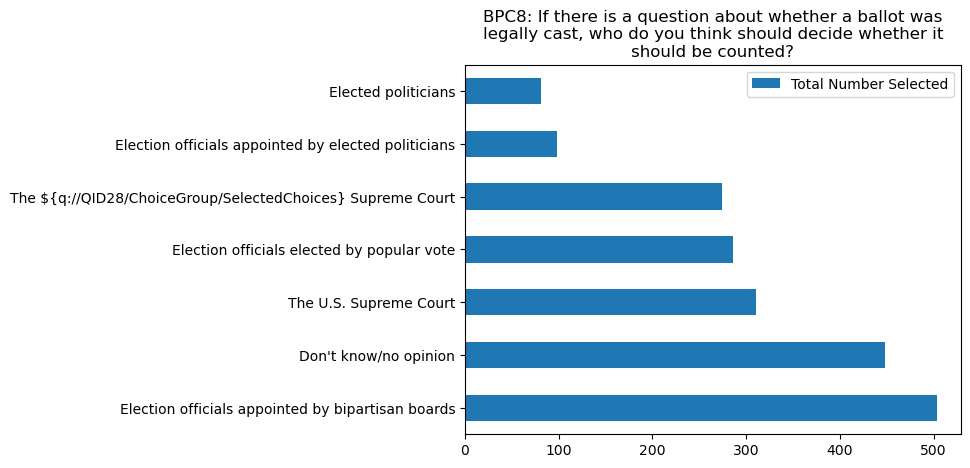

In [13]:
q=8
q8text = "BPC8: If there is a question about whether a ballot was legally cast, who do you think should decide whether it should be counted?"

df = data[[col for col in data.columns if col[:4]=="BPC"+str(q)]]
df_res = df.value_counts().to_frame()

df_res.reset_index(inplace=True)
df_res.set_index(["BPC8"],inplace=True)

#grab names of each category from codebook and sub in as index titles
cats = codebook[codebook["question"]=="BPC"+str(q)][["value","code"]].set_index('value').to_dict()['code']
df_res.index = [cats.get(ind) for ind in df_res.index]

df_res.columns = ["Total Number Selected"]
fig8 = df_res.plot.barh(title="\n".join(wrap(q8text, 60))).get_figure()
fig8.savefig(path+"q"+str(q)+"_toplinebarh.png",bbox_inches='tight')

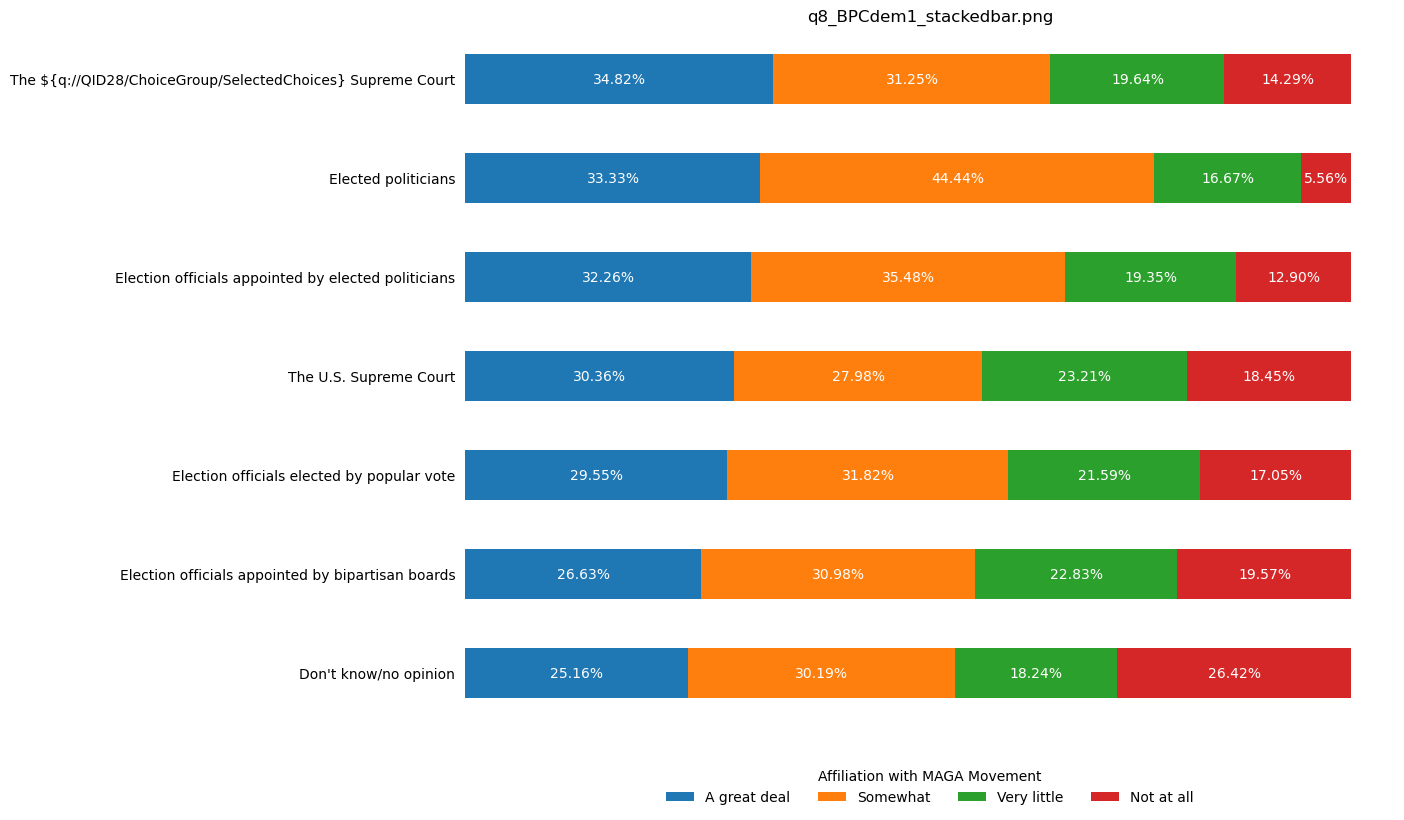

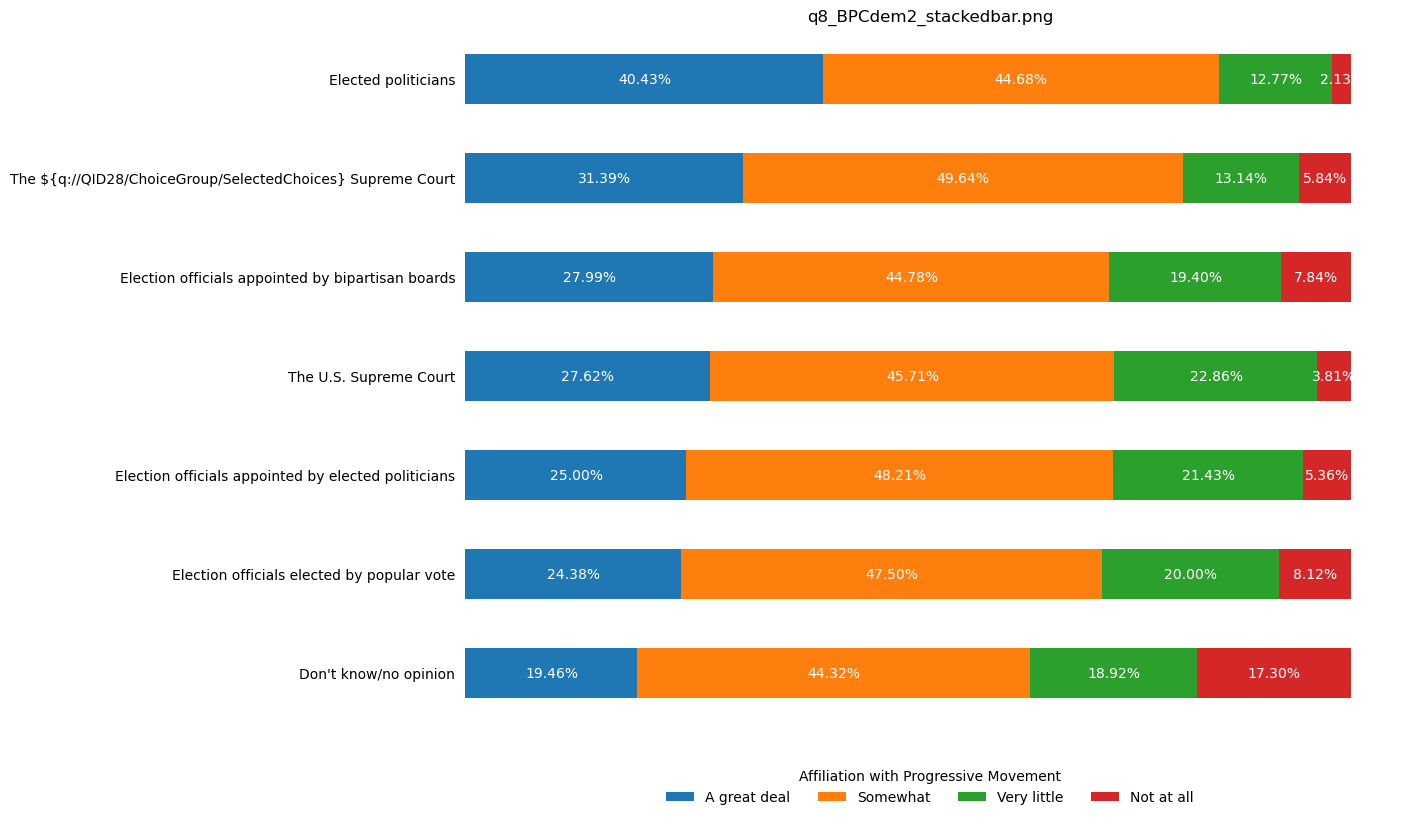

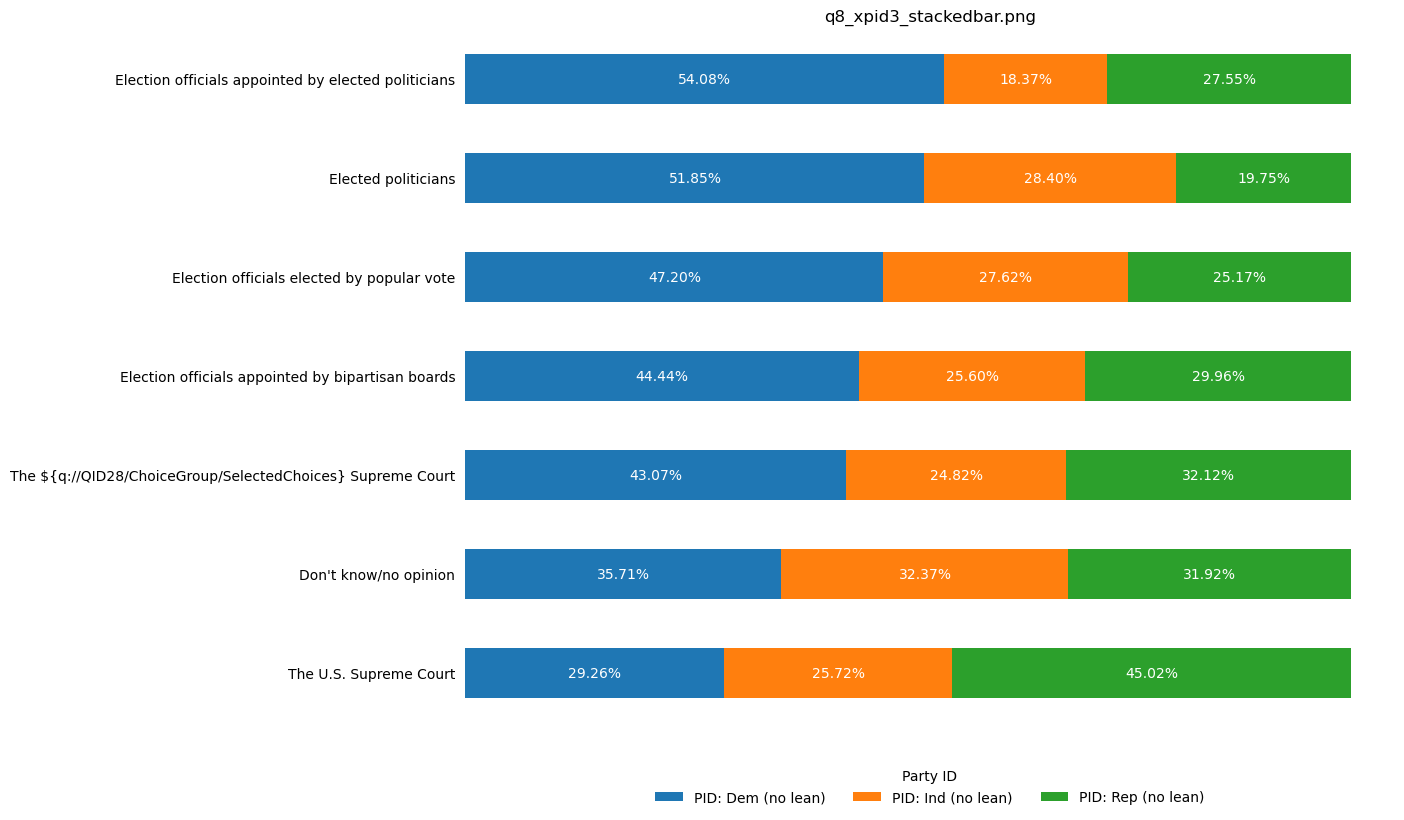

In [14]:
## ANALYZING q8 BY DEMO AND DOWNLOADING FILES
q8analysis(q=8,demo="BPCdem1").to_csv(path+"q8_BPCdem1.csv")
stackedbar(q8analysis(q=8,demo="BPCdem1"),legend_title="Affiliation with MAGA Movement",plot_title="q8_BPCdem1_stackedbar.png")

q8analysis(q=8,demo="BPCdem2").to_csv(path+"q8_BPCdem2.csv")
stackedbar(q8analysis(q=8,demo="BPCdem2"),legend_title="Affiliation with Progressive Movement",plot_title="q8_BPCdem2_stackedbar.png")

q8analysis(q=8,demo="xpid3").to_csv(path+"q8_xpid3.csv")
stackedbar(q8analysis(q=8,demo="xpid3"),legend_title="Party ID",plot_title="q8_xpid3_stackedbar.png")

# Q6 - CONJOINT
XXX need to apply weights here

In [60]:
q=6
df6 = data.copy()

## REPLACE 3 (neither) with 0 in response columns
for letter in list(map(chr, range(97, 103))): #letters a - f in list
    df6["BPC6"+letter] = df6["BPC6"+letter].replace(3,0)
    
q6dict = codebook[codebook["question"]=="BPC6a_cand1n"][["value","code"]].set_index('value').to_dict()['code']

In [64]:
df6res = pd.DataFrame(columns=["cand1n","cand2n","topchoice","item"])

#for each conjoint presented to the respondent a-f
for letter in list(map(chr, range(97, 103))):
    #[first choice,second choice] < 1 is first, 2 is second, otherwise neither
    binary = [[1,0] if value == 1 else [0,1] if value == 2 else [0,0] for value in df6['BPC6'+letter]]
    binary = pd.DataFrame(binary,columns=["first","second"])
    toptwo = df6[["BPC6"+letter+"_cand1n","BPC6"+letter+"_cand2n"]]
    # display(toptwo)

    toptwo["BPC6"+letter+"_topchoice"] = (binary["first"] * toptwo["BPC6"+letter+"_cand1n"]) + (binary["second"] * toptwo["BPC6"+letter+"_cand2n"])
    df6["BPC6"+letter+"_topchoice"] = toptwo["BPC6"+letter+"_topchoice"]
    toptwo.columns = ["cand1n","cand2n","topchoice"]
    toptwo["item"] = ["BPC6"+letter]*len(toptwo)
    df6res = pd.concat([df6res,toptwo])
    
df6res

/tmp/ipykernel_3120/454333308.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toptwo["BPC6"+letter+"_topchoice"] = (binary["first"] * toptwo["BPC6"+letter+"_cand1n"]) + (binary["second"] * toptwo["BPC6"+letter+"_cand2n"])
/tmp/ipykernel_3120/454333308.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toptwo["item"] = ["BPC6"+letter]*len(toptwo)
/tmp/ipykernel_3120/454333308.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,cand1n,cand2n,topchoice,item
0,3,10,10,BPC6a
1,14,9,0,BPC6a
2,2,13,0,BPC6a
3,7,15,7,BPC6a
4,12,13,0,BPC6a
...,...,...,...,...
1997,1,2,0,BPC6f
1998,1,6,0,BPC6f
1999,1,4,0,BPC6f
2000,11,10,11,BPC6f


## overall - bpc6 responses

In [17]:
def bpc6_analysis():
    
    bpc6_overall = pd.DataFrame(columns=["candidate","times offered","times chosen", "neither chosen","second chosen"])

    for cand in range(1,16):
        selected = df6res[(df6res["cand1n"]==cand) | (df6res["cand2n"]==cand)] #filter all responses by candidate (to get number of times that candidate was selected when offered)
        timesoffered = len(selected)
        timeschosen = len(selected[selected["topchoice"]==cand])
        neitherchosen = len(selected[selected["topchoice"]==0])
        secondchosen = len(selected[(selected["topchoice"]!=cand) & (selected["topchoice"]!=0)])
        bpc6_overall.loc[len(bpc6_overall)] = [cand,timesoffered,timeschosen,neitherchosen,secondchosen]

    bpc6_overall["%first"] = bpc6_overall["times chosen"]/bpc6_overall["times offered"]
    bpc6_overall["%second"] = bpc6_overall["second chosen"]/bpc6_overall["times offered"]
    bpc6_overall["%neither"] = bpc6_overall["neither chosen"]/bpc6_overall["times offered"]

    bpc6_overall["candidate_name"]=[q6dict.get(v) for v in bpc6_overall["candidate"]]
    return(bpc6_overall)

# bpc6_analysis()

In [18]:
# #CHECK SUM - good
# bpc6_overall["times chosen"] + bpc6_overall["neither chosen"]+bpc6_overall["second chosen"] == bpc6_overall ["times offered"] #< CHECK SUM

## demo-specific bpc6 responses

In [19]:
def bpc6_demo(demo):
    cols = []
    for d in list(codebook[codebook["question"]==demo]['value']): #for each demo category
        cols = cols + ["offered_"+demo+"_cat"+str(d),"top_"+demo+"_cat"+str(d), "second_"+demo+"_cat"+str(d),"neither_"+demo+"_cat"+str(d)]

    bpc6_demo_overall = pd.DataFrame(columns=cols)
    bpc6_demo_overall.index.name = 'candidate'
    bpc6_demo_summary = pd.DataFrame(columns=['candidate',demo+'_demo','top','second','neither'])

    for cand in range(1,16): ##for each candidate/messenger

        demoresults = [cand]

        for d in list(codebook[codebook["question"]==demo]['value']): ##for each demographic category find messenger selections
            df6res_demo = df6res.join(data[[demo]])
            df6res_demo = df6res_demo[df6res_demo[demo]==d]
            selected = df6res_demo[(df6res_demo["cand1n"]==cand) | (df6res_demo["cand2n"]==cand)] #filter all responses by candidate (to get number of times that candidate was selected when offered)
            timesoffered = len(selected)
            timeschosen = len(selected[selected["topchoice"]==cand])
            neitherchosen = len(selected[selected["topchoice"]==0])
            secondchosen = len(selected[(selected["topchoice"]!=cand) & (selected["topchoice"]!=0)])
            demoresults = demoresults + [timesoffered,timeschosen,secondchosen,neitherchosen]

        temp = pd.DataFrame(demoresults).transpose()
        temp.columns = ['candidate'] + cols
        temp.set_index('candidate',inplace=True,drop=True)
        bpc6_demo_overall = pd.concat([bpc6_demo_overall,temp])

        for d in list(codebook[codebook["question"]==demo]['value']): #for each demographic
            li = bpc6_demo_overall.loc[cand]
            top = li["top_"+demo+"_cat"+str(d)]/li["offered_"+demo+"_cat"+str(d)]
            second = li["second_"+demo+"_cat"+str(d)]/li["offered_"+demo+"_cat"+str(d)]
            neither = li["neither_"+demo+"_cat"+str(d)]/li["offered_"+demo+"_cat"+str(d)]
            temp_d = pd.DataFrame([cand,d,top,second,neither]).transpose()
            temp_d.columns = ['candidate',demo+'_demo','top','second','neither']
            bpc6_demo_summary = pd.concat([bpc6_demo_summary,temp_d])

    bpc6_demo_summary.set_index('candidate',inplace=True)
    bpc6_demo_summary.sort_values(bpc6_demo_summary.columns[0],ascending=False,inplace=True)
    bpc6_demo_summary["candidate_name"]=[q6dict.get(v) for v in bpc6_demo_summary.index]

    demodict = codebook[codebook["question"]==demo][['value','code']].set_index('value').to_dict()['code']
    bpc6_demo_summary[demo+'_demo_name'] = [demodict.get(x) for x in bpc6_demo_summary[demo+'_demo']]
    bpc6_demo_summary.sort_values(by=[demo+"_demo","top"],ascending=True,inplace=True)
    bpc6_demo_summary = bpc6_demo_summary.melt(id_vars=[demo+"_demo","candidate_name",demo+"_demo_name"])

    return(bpc6_demo_overall, bpc6_demo_summary)

In [20]:
demo = 'BPCdem2'
overall,summary = bpc6_demo(demo)
summary

summary.to_csv(path+'//q6//'+demo+'_melted.csv',index=False)